In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fire=pd.read_csv('/content/amazon.csv',encoding='iso-8859-1',parse_dates=['date'])
fire.head(1)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01


In [ ]:
fire.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
fire.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


**Data Overview**

In [ ]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


**Drop Duplicates If Any**

In [ ]:
fire.drop_duplicates(inplace=True)


**Data Overview After Dropping Duplicates**

In [ ]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


**Checking Null Values**

In [ ]:
fire.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**Statistical Analysis of Data**

In [ ]:
fire.describe(include='all')

<ipython-input-8-d9c84244385c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fire.describe(include='all')


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


**Unique Months**

In [ ]:
fire['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

**Converting Months to English Months**

In [ ]:
fire['Eng_month']=fire['month'].map({'Janeiro':'January', 'Fevereiro':'Febuary', 'Março':'March', 'Abril':'April', 'Maio':'May', 'Junho':'June', 'Julho':'July',
       'Agosto':'August', 'Setembro':'September', 'Outubro':'October', 'Novembro':'November', 'Dezembro':'December'})

In [ ]:
fire.head(10)

,year,state,month,number,date,Eng_month
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January
5,2003,Acre,Janeiro,10.0,2003-01-01,January
6,2004,Acre,Janeiro,0.0,2004-01-01,January
7,2005,Acre,Janeiro,12.0,2005-01-01,January
8,2006,Acre,Janeiro,4.0,2006-01-01,January
9,2007,Acre,Janeiro,0.0,2007-01-01,January


**Total Rows and Columns of Data**

In [ ]:
fire.shape

(6422, 6)

In [ ]:
fire.groupby('Eng_month')['number'].sum().sort_values(ascending=False).reset_index().head(1)


,Eng_month,number
0,July,92319.113


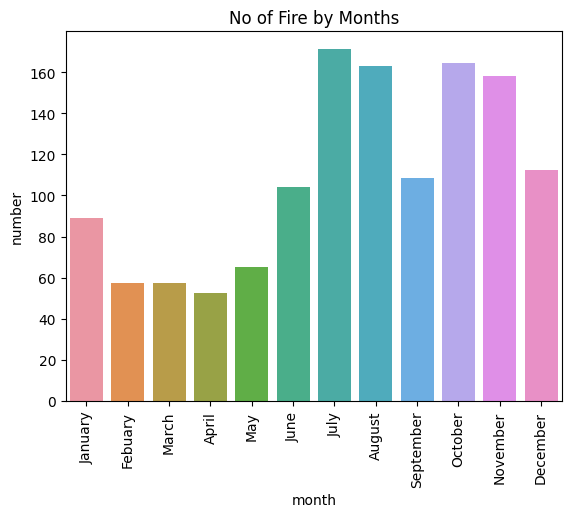

In [ ]:
sns.barplot(data=fire,x='Eng_month',y='number',errorbar=None)
plt.xlabel('month',fontsize=10)
plt.xticks(rotation=90)
plt.title('No of Fire by Months')
plt.show()


In [ ]:
FireYear=fire.groupby('year')['number'].sum().sort_values().reset_index()
FireYear

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2008,29378.964
5,2007,33028.413
6,2006,33824.161
7,2011,34633.545
8,2005,35004.965
9,2013,35137.118


**Nos. Of Fire By Year**

<Axes: xlabel='year', ylabel='number'>

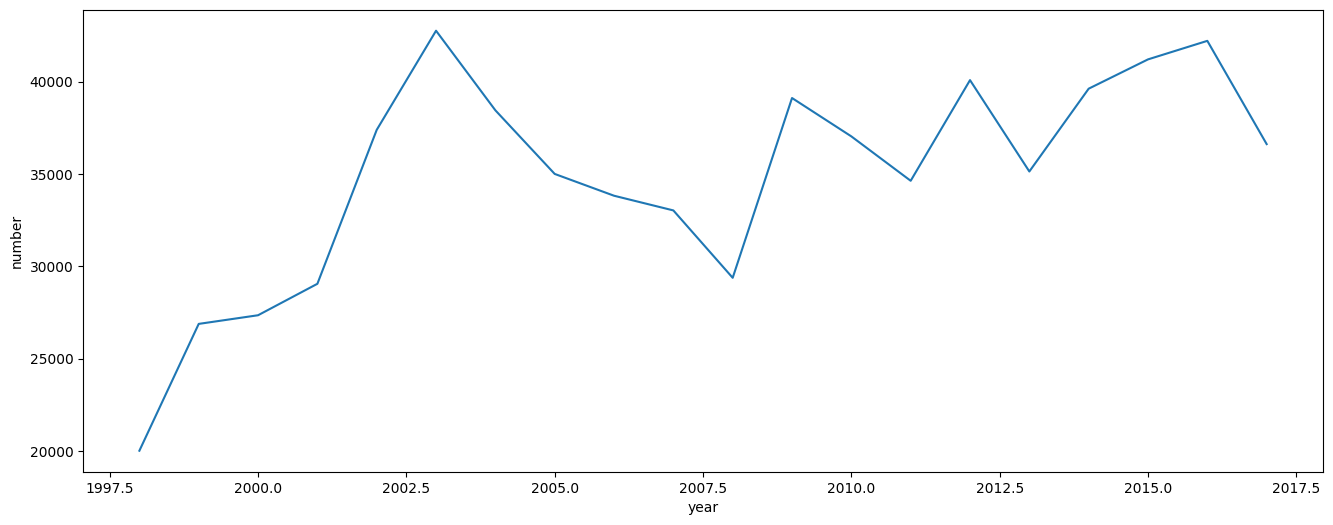

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=FireYear,x='year',y='number')


**Nos. Of Fire By States Highest to Lowest**

In [ ]:
fire.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()


,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


**Total Nos.Of Fire in Amazonas State**

In [ ]:
fire[fire['state']=='Amazonas']['number'].sum()


30650.129

**Total Nos.Of Fire in Amazonas State by Year**

In [ ]:
Afire=fire[fire['state']=='Amazonas']
Afire1=Afire.groupby('year')['number'].sum().reset_index()
Afire1

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


Text(0.5, 0, 'Year')

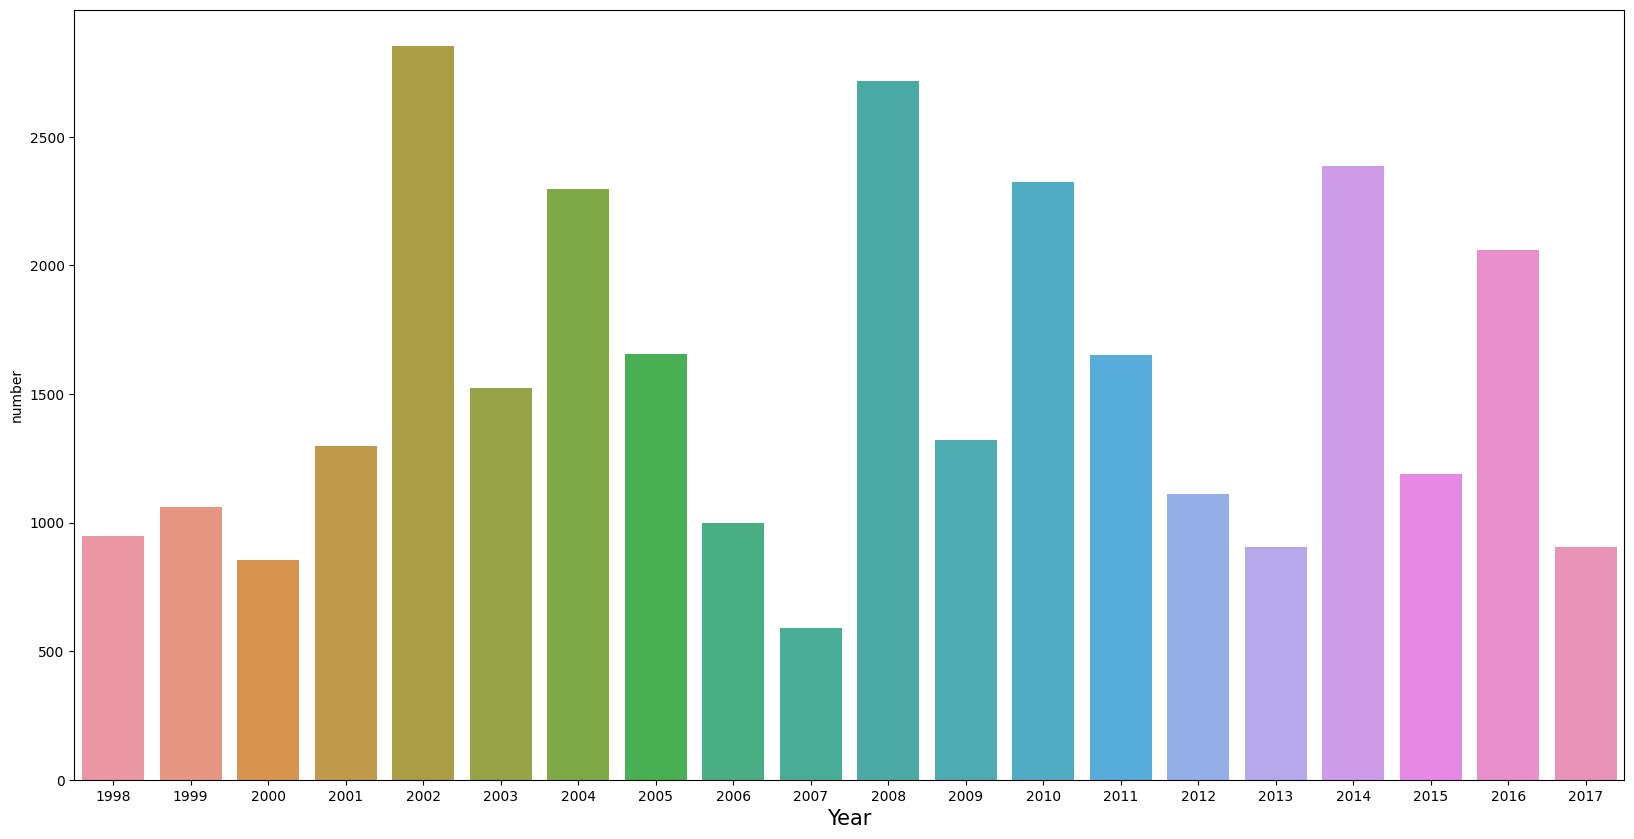

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=Afire1,x='year',y='number')
plt.xlabel('Year',fontsize=15)

**Nos. Of Fire By Weekdays**

In [ ]:

day=Afire.groupby(Afire['date'].dt.dayofweek)['number'].sum()
day

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [ ]:
import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()
day


,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


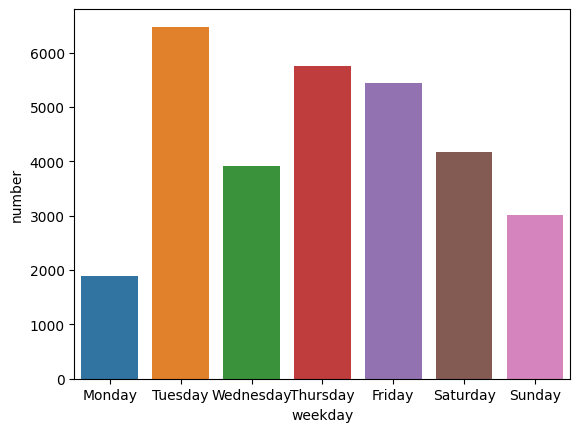

In [ ]:
sns.barplot(data=day,x='index',y='number')
plt.xlabel('weekday')
plt.show()

**Total Nos.Of Fire in 2015**

In [ ]:
fire[fire['year']==2015]['number'].sum()

41208.292

**No.Of Fire By Months**

In [ ]:
fire2015=fire[fire['year']==2015].groupby('Eng_month')['number'].sum().reset_index()
fire2015

,Eng_month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,Febuary,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


Text(0.5, 0, 'month')

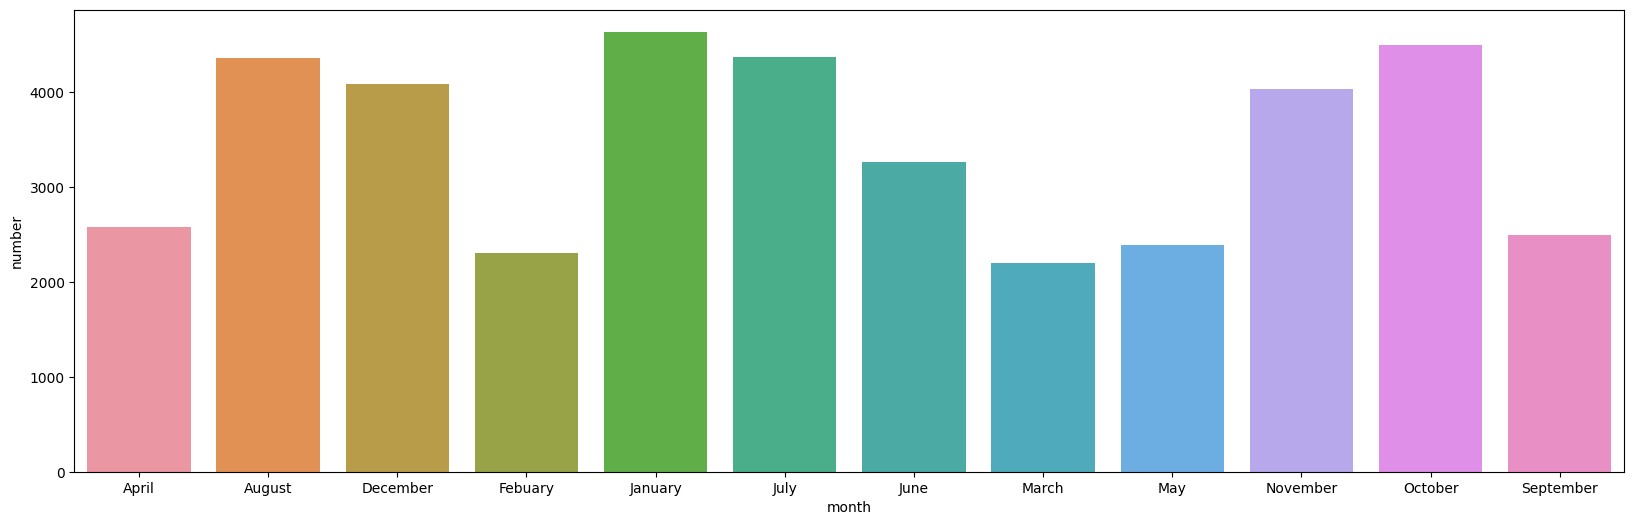

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=fire2015,x='Eng_month',y='number')
plt.xlabel('month')

**No.Of Fire By State**

In [ ]:
fireState=fire.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()
fireState

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


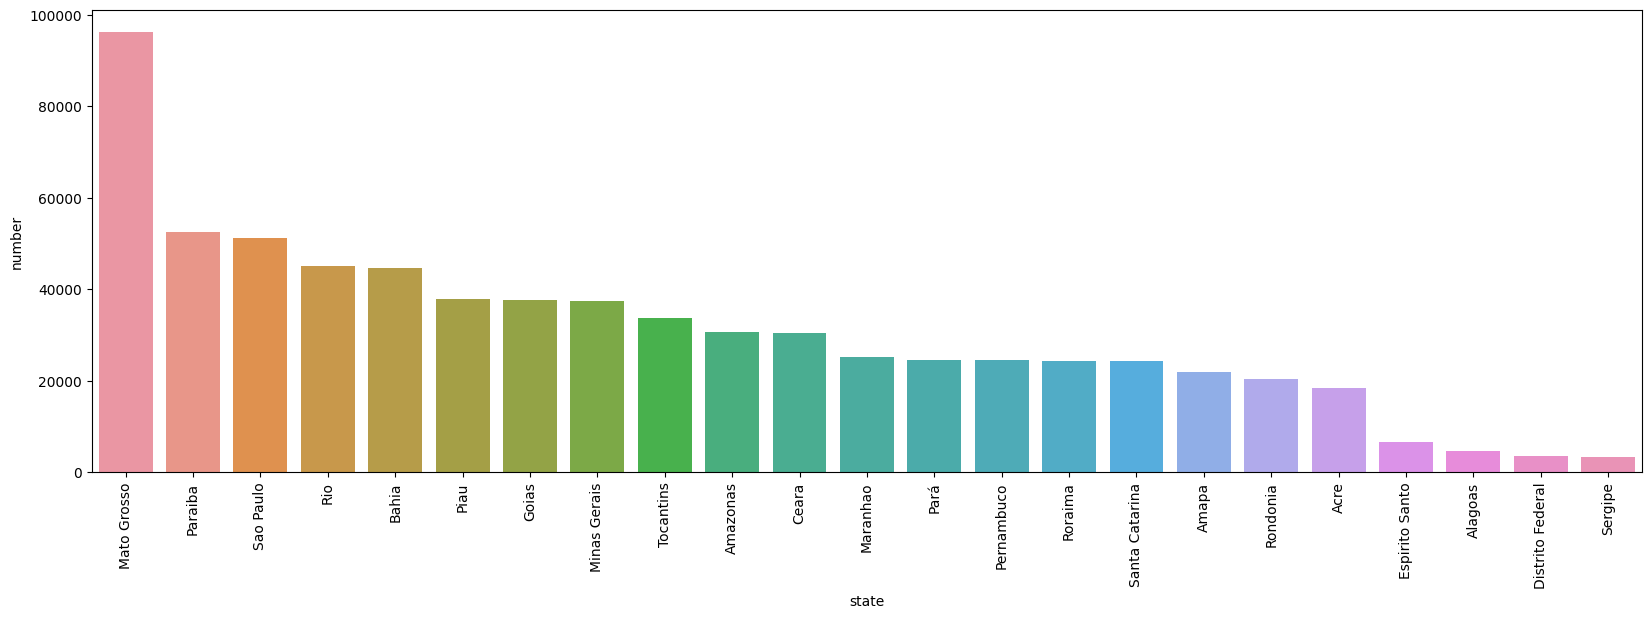

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=fireState,x='state',y='number')
plt.xticks(rotation=90)
plt.show()